<a href="https://colab.research.google.com/github/HamedFarahani89/AI-Lab/blob/main/SimpleRNN_DUDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### import libraries
import torch
import torch.nn as nn
import numpy as np

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20231204125839/What-is-Recurrent-Neural-Network-660.webp" alt="Recurrent Neural Network Image" width="400" height="200">


# Pass the fake data to the RNN

In [2]:
# set layer parameters
input_size  =  9 # number of features to extract (e.g., number of data channels)
hidden_size = 16 # number of units in the hidden state
num_layers  =  1 # number of vertical stacks of hidden layers (note: only the final layer gives an output)
actfun      = 'tanh'
bias        = True

# create an RNN instance
rnn = nn.RNN(input_size,hidden_size,num_layers,nonlinearity=actfun,bias=bias)
print(rnn)

RNN(9, 16)


In [3]:
# set data parameters
seqlength = 5
batchsize = 2

# create some data
X = torch.rand(seqlength,batchsize,input_size)
print(f' Input shape: {list(X.shape)}')
print('')
print(X[:2])


 Input shape: [5, 2, 9]

tensor([[[0.9393, 0.0333, 0.8105, 0.1422, 0.3161, 0.3552, 0.9819, 0.4407,
          0.2411],
         [0.2950, 0.7629, 0.3919, 0.0943, 0.8488, 0.3731, 0.1249, 0.4574,
          0.6878]],

        [[0.4932, 0.0652, 0.0624, 0.2601, 0.2109, 0.7244, 0.1865, 0.0930,
          0.9421],
         [0.6433, 0.2292, 0.0814, 0.3744, 0.3178, 0.8783, 0.4570, 0.3817,
          0.1837]]])


In [4]:
# create a hidden layer (typically initialized as zeros)
hidden = torch.zeros(num_layers,batchsize,hidden_size)
print(hidden)

print('')
# run some data through the model and show the output sizes
y,h = rnn(X,hidden)
print(y[:2])

print('')
print(f'Hidden shape: {list(h.shape)}')
print(f'Output shape: {list(y.shape)}')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]])

tensor([[[-0.5303, -0.2097, -0.0067, -0.1144,  0.2511, -0.2150, -0.3026,
          -0.2202,  0.1578, -0.1019, -0.2149,  0.2322, -0.1101,  0.2752,
           0.2444,  0.1904],
         [-0.3424, -0.2901, -0.1357,  0.1358, -0.1962, -0.0092, -0.1900,
          -0.2570,  0.2012,  0.1384, -0.3618,  0.1095, -0.3741, -0.1163,
           0.3508,  0.2910]],

        [[-0.5232, -0.2210, -0.0211,  0.3456, -0.1433, -0.3917, -0.4181,
          -0.2845,  0.2704,  0.3009, -0.1755, -0.0745, -0.1960,  0.1232,
           0.1234,  0.2678],
         [-0.6159, -0.4194, -0.2076,  0.2225, -0.0244, -0.2766, -0.4095,
          -0.2255,  0.5202,  0.1574, -0.3714,  0.1058, -0.0836,  0.2679,
           0.0993,  0.3432]]], grad_fn=<SliceBackward0>)

Hidden shape: [1, 2, 16]
Output shape: [5, 2, 16]


In [5]:
# Check out the learned parameters and their sizes
for p in rnn.named_parameters():
  print(f'{p[0]} has size {list(p[1].shape)}')

weight_ih_l0 has size [16, 9]
weight_hh_l0 has size [16, 16]
bias_ih_l0 has size [16]
bias_hh_l0 has size [16]


# Create a DL model class

In [6]:
class RNNnet(nn.Module):
  def __init__(self,input_size,num_hidden,num_layers):
    super().__init__()

    # store parameters
    self.input_size = input_size
    self.num_hidden = num_hidden
    self.num_layers = num_layers

    # RNN Layer
    self.rnn = nn.RNN(input_size,num_hidden,num_layers)

    # linear layer for output
    self.out = nn.Linear(num_hidden,1)

  def forward(self,x):

    print(f'Input: {list(x.shape)}')

    # initialize hidden state for first input
    hidden = torch.zeros(self.num_layers,batchsize,self.num_hidden)
    print(f'Hidden: {list(hidden.shape)}')

    # run through the RNN layer
    y,hidden = self.rnn(x,hidden)
    print(f'RNN-out: {list(y.shape)}')
    print(f'RNN-hidden: {list(hidden.shape)}')

    # pass the RNN output through the linear output layer
    o = self.out(y)
    print(f'Output: {list(o.shape)}')

    return o,hidden

In [7]:
# create an instance of the model and inspect
net = RNNnet(input_size,hidden_size,num_layers)
print(net), print(' ')

RNNnet(
  (rnn): RNN(9, 16)
  (out): Linear(in_features=16, out_features=1, bias=True)
)
 


(None, None)

In [8]:
# test the model with some data
# create some data
X = torch.rand(seqlength,batchsize,input_size)
y = torch.rand(seqlength,batchsize,1)

yHat,h = net(X)

# try a loss function
lossfun = nn.MSELoss()
lossfun(yHat,y)
print(yHat)

Input: [5, 2, 9]
Hidden: [1, 2, 16]
RNN-out: [5, 2, 16]
RNN-hidden: [1, 2, 16]
Output: [5, 2, 1]
tensor([[[ 0.0370],
         [-0.1982]],

        [[-0.2056],
         [ 0.0690]],

        [[-0.0636],
         [-0.1398]],

        [[-0.0326],
         [ 0.0225]],

        [[-0.2015],
         [-0.0137]]], grad_fn=<ViewBackward0>)


# Try on alternating sequences

In [9]:
# for printing out status reports
import sys

# for data visualization
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

<ipython-input-9-4ecb782b1f77>:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


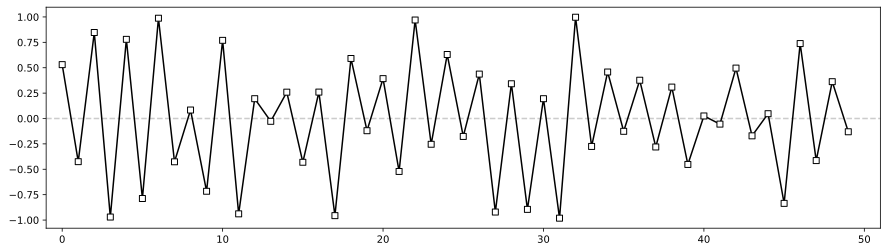

In [10]:
# import the data
N = 50

data = torch.zeros(N)

for i in range(N):
  data[i] = torch.rand(1) * (-1)**i

plt.figure(figsize=(15,4))
plt.plot([-1,N+1],[0,0],'--',color=[.8,.8,.8])
plt.plot(data,'ks-',markerfacecolor='w')
plt.xlim([-1,N+1])
plt.show()

In [11]:
class rnnnet(nn.Module):
  def __init__(self,input_size,num_hidden,num_layers):
    super().__init__()

    # RNN Layer
    self.rnn = nn.RNN(input_size,num_hidden,num_layers)

    # linear layer for output
    self.out = nn.Linear(num_hidden,1)

  def forward(self, x):

    # run through the RNN layer
    y,hidden = self.rnn(x) # no explicit hidden state initialization

    # and the output (linear) layer
    y = self.out(y)

    return y,hidden




In [12]:
# network parameters
input_size =  1 # "channels" of data
num_hidden =  5 # breadth of model (number of units in hidden layers)
num_layers =  1 # depth of model (number of "stacks" of hidden layers)
seqlength  =  9 # number of datapoints used for learning in each segment
batchsize  =  1 # Note: the training code is actually hard-coded to organize data into batchsize=1

# create an instance of the model and inspect
net = rnnnet(input_size,num_hidden,num_layers)

In [13]:
# test the model with some data
somedata = data[:seqlength].view(seqlength,1,1)
print(somedata)
y = net(somedata)
print(y[0][-1])
# grab the final predicted value from the output (first element of tuple output of net)
finalValue = y[0][-1]

lossfun = nn.MSELoss()
lossfun(finalValue,data[seqlength].view(1,1))

tensor([[[ 0.5306]],

        [[-0.4250]],

        [[ 0.8469]],

        [[-0.9705]],

        [[ 0.7797]],

        [[-0.7880]],

        [[ 0.9879]],

        [[-0.4265]],

        [[ 0.0835]]])
tensor([[-0.6414]], grad_fn=<SelectBackward0>)


tensor(0.0057, grad_fn=<MseLossBackward0>)

In [14]:
# number of training epochs
numepochs = 30

# create a new instance of the model (and optimizer!)
net = rnnnet(input_size,num_hidden,num_layers)
optimizer = torch.optim.SGD(net.parameters(),lr=.001)



# initialize losses
losses = np.zeros(numepochs)
signaccuracy = np.zeros(numepochs)

# loop over epochs
for epochi in range(numepochs):

  # loop over data segments
  seglosses = []
  segacc    = []
  hidden_state = torch.zeros(num_layers,batchsize,num_hidden) # reset the hidden state on each epoch

  for timei in range(N-seqlength):

    # grab a snippet of data
    X = data[timei:timei+seqlength].view(seqlength,1,1)
    y = data[timei+seqlength].view(1,1)

    # forward pass and loss
    yHat,hidden_state = net(X)
    finalValue = yHat[-1]
    loss = lossfun(finalValue,y) # compare final value of output

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # loss from this segment
    seglosses.append(loss.item())

    # also get sign accuracy
    truesign = np.sign(torch.squeeze(y).numpy())
    predsign = np.sign(torch.squeeze(finalValue).detach().numpy())
    accuracy = 100*(truesign==predsign)
    segacc.append(accuracy)

  # average losses from this epoch
  losses[epochi] = np.mean(seglosses)
  signaccuracy[epochi] = np.mean(segacc)

  msg = f'Finished epoch {epochi+1}/{numepochs}'
  sys.stdout.write('\r' + msg)

Finished epoch 30/30

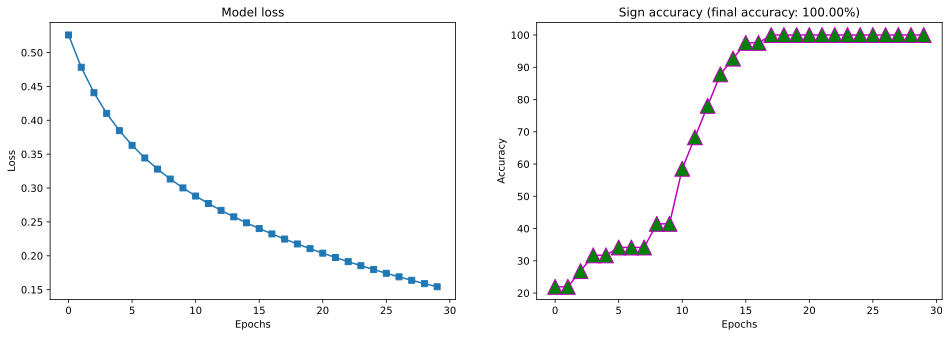

In [15]:
## let's see how the model did!

fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses,'s-')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')

ax[1].plot(signaccuracy,'m^-',markerfacecolor='g',markersize=15)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Sign accuracy (final accuracy: %.2f%%)'%signaccuracy[-1])

plt.show()

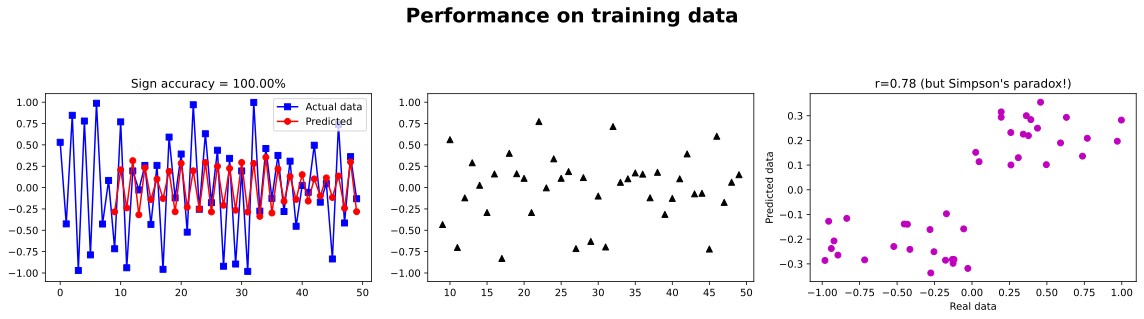

In [16]:
# initialize hidden state
h = np.zeros((N,num_hidden))

# initialize predicted values
yHat = np.zeros(N)
yHat[:] = np.nan


# loop over time segments
for timei in range(N-seqlength):

  # grab a snippet of data
  X = data[timei:timei+seqlength].view(seqlength,1,1)

  # forward pass and loss
  yy,hh = net(X)
  yHat[timei+seqlength] = yy[-1]
  h[timei+seqlength,:] = hh.detach()


## compute sign-accuracy
truesign = np.sign(data.numpy())
predsign = np.sign(yHat)
signaccuracy = 100*np.mean(truesign[seqlength:]==predsign[seqlength:])


## plot!
fig,ax = plt.subplots(1,3,figsize=(16,4))
ax[0].plot(data,'bs-',label='Actual data')
ax[0].plot(yHat,'ro-',label='Predicted')
ax[0].set_ylim([-1.1,1.1])
ax[0].set_title('Sign accuracy = %.2f%%' %signaccuracy)
ax[0].legend()

ax[1].plot(data-yHat,'k^')
ax[1].set_ylim([-1.1,1.1])

ax[2].plot(data[seqlength:],yHat[seqlength:],'mo')
ax[2].set_xlabel('Real data')
ax[2].set_ylabel('Predicted data')
r = np.corrcoef(data[seqlength:],yHat[seqlength:])
ax[2].set_title(f"r={r[0,1]:.2f} (but Simpson's paradox!)")

plt.suptitle('Performance on training data',fontweight='bold',fontsize=20,y=1.1)
plt.tight_layout()
plt.show()

In [17]:
7

7